In [3]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from photutils.centroids import centroid_quadratic

In [10]:
img = fits.getdata('galfit.fits', 1)
model = fits.getdata('galfit.fits', 2)
residual = fits.getdata('galfit.fits', 3)
PSF = fits.getdata('subcomps.fits', 2)
sersic = fits.getdata('subcomps.fits', 3)
# xycen = centroid_quadratic(data, xpeak=48, ypeak=52)
# print(xycen)  

In [11]:
from photutils.centroids import centroid_quadratic
xycen = centroid_quadratic(PSF, xpeak=200, ypeak=200)
print(xycen)  

[200.00334804 200.22265704]


In [14]:
from photutils.profiles import RadialProfile
edge_radii = np.arange(50)
rp_img = RadialProfile(img, xycen, edge_radii, error=None, mask=None)
rp_PSF = RadialProfile(PSF, xycen, edge_radii, error=None, mask=None)
rp_sersic = RadialProfile(sersic, xycen, edge_radii, error=None, mask=None)
rp_residual = RadialProfile(residual, xycen, edge_radii, error=None, mask=None)

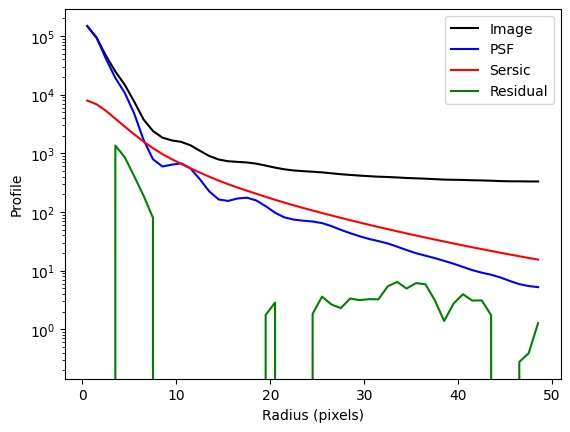

In [16]:
rp_img.plot(label='Image', color='black')
rp_PSF.plot(label='PSF', color='b')
rp_sersic.plot(label='Sersic', color='r')
rp_residual.plot(label='Residual', color='g')
plt.legend()
plt.yscale('log')